# Comparison of RIC and RBDS marker set protocol

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

This NB compares the marker set protocols employed by the Running Injury Clinic (during my PhD work) and the RBDS study.

In [1]:
# Prepare environment
import os
import scipy.io as spio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# Import data
pathname = r'../data'

## RBDS data set

In [3]:
fname_out_RBDS = os.path.join(pathname, 'RBDS_static.csv')
df_s_RBDS = pd.read_csv(fname_out_RBDS, delimiter=',', index_col='Time')

In [4]:
df_s_RBDS.head()

,LMAL_X,LMAL_Y,LMAL_Z,LMAM_X,LMAM_Y,LMAM_Z,LASI_X,LASI_Y,LASI_Z,LGTR_X,...,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z,RTUB_X,RTUB_Y,RTUB_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,705.062866,108.774330,1050.909424,725.535095,119.272575,1129.002441,876.648743,1067.346436,1126.366577,799.197205,...,1345.514282,725.082825,761.838928,1398.587158,676.568359,760.431702,1347.822632,780.426636,462.710876,1343.646973
0.006711,705.066833,108.766876,1050.910889,725.530396,119.266960,1129.005005,876.686035,1067.344360,1126.387573,799.232788,...,1345.495483,725.089050,761.827515,1398.581421,676.584167,760.432800,1347.808350,780.445190,462.712555,1343.645752
0.013423,705.065430,108.771133,1050.902832,725.532959,119.267067,1129.006104,876.736938,1067.349854,1126.407471,799.294189,...,1345.485840,725.094055,761.832520,1398.583130,676.592529,760.428711,1347.793579,780.457764,462.725372,1343.636353
0.020134,705.067078,108.770615,1050.907104,725.535950,119.267815,1129.002930,876.780396,1067.346436,1126.431274,799.340088,...,1345.468140,725.094055,761.823364,1398.575684,676.612793,760.425476,1347.788452,780.471008,462.721649,1343.632812
0.026846,705.060730,108.771179,1050.905151,725.534241,119.267807,1129.004883,876.821350,1067.347900,1126.442627,799.390625,...,1345.458984,725.103516,761.824829,1398.569946,676.621399,760.423767,1347.771729,780.485840,462.709076,1343.625610


## Calculate Euler angles
Test first with static trial

In [5]:
def euler_angles_from_rot_xyz(rot_matrix, unit='deg'):
    """ Compute Euler angles from rotation matrix in the xyz sequence."""
    
    import numpy as np

    R = np.array(rot_matrix, copy=False).astype(np.float64)[:3, :3]
    angles = np.zeros(3)
    
    angles[0] = np.arctan2(-R[2, 1], R[2, 2])
    angles[1] = np.arctan2( R[2, 0], np.sqrt(R[0, 0]**2 + R[1, 0]**2))
    angles[2] = np.arctan2(-R[1, 0], R[0, 0])

    if unit[:3].lower() == 'deg': # convert from rad to degree
        angles = np.rad2deg(angles)

    return angles

In [6]:
df_s_RBDS.head()

,LMAL_X,LMAL_Y,LMAL_Z,LMAM_X,LMAM_Y,LMAM_Z,LASI_X,LASI_Y,LASI_Z,LGTR_X,...,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z,RTUB_X,RTUB_Y,RTUB_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,705.062866,108.774330,1050.909424,725.535095,119.272575,1129.002441,876.648743,1067.346436,1126.366577,799.197205,...,1345.514282,725.082825,761.838928,1398.587158,676.568359,760.431702,1347.822632,780.426636,462.710876,1343.646973
0.006711,705.066833,108.766876,1050.910889,725.530396,119.266960,1129.005005,876.686035,1067.344360,1126.387573,799.232788,...,1345.495483,725.089050,761.827515,1398.581421,676.584167,760.432800,1347.808350,780.445190,462.712555,1343.645752
0.013423,705.065430,108.771133,1050.902832,725.532959,119.267067,1129.006104,876.736938,1067.349854,1126.407471,799.294189,...,1345.485840,725.094055,761.832520,1398.583130,676.592529,760.428711,1347.793579,780.457764,462.725372,1343.636353
0.020134,705.067078,108.770615,1050.907104,725.535950,119.267815,1129.002930,876.780396,1067.346436,1126.431274,799.340088,...,1345.468140,725.094055,761.823364,1398.575684,676.612793,760.425476,1347.788452,780.471008,462.721649,1343.632812
0.026846,705.060730,108.771179,1050.905151,725.534241,119.267807,1129.004883,876.821350,1067.347900,1126.442627,799.390625,...,1345.458984,725.103516,761.824829,1398.569946,676.621399,760.423767,1347.771729,780.485840,462.709076,1343.625610


In [7]:
rkjc = (df_s_RBDS[['RKNL_X','RKNL_Y','RKNL_Z']].values[100]+df_s_RBDS[['RKNM_X','RKNM_Y','RKNM_Z']].values[100])/2
rkjc

array([ 733.43203735,  546.6859436 , 1329.13012695])

In [8]:
rkjc = (df_s_RBDS[['RKNL_X','RKNL_Y','RKNL_Z']].values[100]+df_s_RBDS[['RKNM_X','RKNM_Y','RKNM_Z']].values[100])/2
rajc = (df_s_RBDS[['RMAL_X','RMAL_Y','RMAL_Z']].values[100]+df_s_RBDS[['RMAM_X','RMAM_Y','RMAM_Z']].values[100])/2

v2 = rkjc - rajc
v1 = np.cross(v2, df_s_RBDS[['RMAL_X','RMAL_Y','RMAL_Z']].values[100] - rajc)
v3 = np.cross(v1, v2)

print('Versors:')
v1 = v1/np.linalg.norm(v1)
print('v1 =', v1)
v2 = v2/np.linalg.norm(v2)
print('v2 =', v2)
v3 = v3/np.linalg.norm(v3)
print('v3 =', v3)

bs = np.array([v1, v2, v3])

Versors:
v1 = [ 0.97634014 -0.03749143  0.21296555]
v2 = [ 0.05184651  0.99671466 -0.06222402]
v3 = [-0.20993302  0.07179333  0.97507633]


In [9]:
RlG = np.array([v1, v2, v3])
print('Rotation matrix from Global to local coordinate system:\n', RlG)

Rotation matrix from Global to local coordinate system:
 [[ 0.97634014 -0.03749143  0.21296555]
 [ 0.05184651  0.99671466 -0.06222402]
 [-0.20993302  0.07179333  0.97507633]]


In [10]:
euler_angles_from_rot_xyz(RlG)

array([ -4.21099924, -12.11842687,  -3.03971816])

Joint coordinate system Grood & Suntay

In [11]:
print(df_s_RBDS.columns.tolist())

['LMAL_X', 'LMAL_Y', 'LMAL_Z', 'LMAM_X', 'LMAM_Y', 'LMAM_Z', 'LASI_X', 'LASI_Y', 'LASI_Z', 'LGTR_X', 'LGTR_Y', 'LGTR_Z', 'LHED_X', 'LHED_Y', 'LHED_Z', 'LHEL_X', 'LHEL_Y', 'LHEL_Z', 'LHEP_X', 'LHEP_Y', 'LHEP_Z', 'LFIB_X', 'LFIB_Y', 'LFIB_Z', 'LIC_X', 'LIC_Y', 'LIC_Z', 'LKNL_X', 'LKNL_Y', 'LKNL_Z', 'LKNM_X', 'LKNM_Y', 'LKNM_Z', 'LMH1_X', 'LMH1_Y', 'LMH1_Z', 'LTOE_X', 'LTOE_Y', 'LTOE_Z', 'LMH5_X', 'LMH5_Y', 'LMH5_Z', 'LPSI_X', 'LPSI_Y', 'LPSI_Z', 'LSBL_X', 'LSBL_Y', 'LSBL_Z', 'LSBM_X', 'LSBM_Y', 'LSBM_Z', 'LSTL_X', 'LSTL_Y', 'LSTL_Z', 'LSTM_X', 'LSTM_Y', 'LSTM_Z', 'LTBL_X', 'LTBL_Y', 'LTBL_Z', 'LTBM_X', 'LTBM_Y', 'LTBM_Z', 'LTTL_X', 'LTTL_Y', 'LTTL_Z', 'LTTM_X', 'LTTM_Y', 'LTTM_Z', 'LTUB_X', 'LTUB_Y', 'LTUB_Z', 'RMAL_X', 'RMAL_Y', 'RMAL_Z', 'RMAM_X', 'RMAM_Y', 'RMAM_Z', 'RASI_X', 'RASI_Y', 'RASI_Z', 'RGTR_X', 'RGTR_Y', 'RGTR_Z', 'RHED_X', 'RHED_Y', 'RHED_Z', 'RHEL_X', 'RHEL_Y', 'RHEL_Z', 'RHEP_X', 'RHEP_Y', 'RHEP_Z', 'RFIB_X', 'RFIB_Y', 'RFIB_Z', 'RIC_X', 'RIC_Y', 'RIC_Z', 'RKNL_X', 'RKNL

Hip joint center
https://c-motion.com/v3dwiki/index.php?title=Coda_Pelvis
RHJC=(-0.19*ASIS_Distance,-0.3*ASIS_Distance,0.36*ASIS_Distance)

In [12]:
RASI = df_s_RBDS[['RASI_X','RASI_Y','RASI_Z']].values
LASI = df_s_RBDS[['LASI_X','LASI_Y','LASI_Z']].values
ASIS_distance = np.linalg.norm(RASI-LASI, axis=1)
rhjc = np.array([RASI[:,0]-0.19*ASIS_distance, RASI[:,1]-0.3*ASIS_distance, RASI[:,2]-0.36*ASIS_distance]).T
rhjc = rhjc[100,:]

In [13]:
# Thigh reference system
v2t = rkjc-rhjc
v1t = np.cross(v2t,df_s_RBDS[['RKNL_X','RKNL_Y','RKNL_Z']].values[100]-rkjc)
v3t = np.cross(v2t,v1t)

v1t = v1t/np.linalg.norm(v1t)
v2t = v2t/np.linalg.norm(v2t)
v3t = v3t/np.linalg.norm(v3t)

bt = np.array([v1t,v2t,v3t])

## Knee joint angle

In [14]:
def kneeang(proxrf, distalrf):
    """
    Calculate 3D knee joint angle in degrees
    """
    angk = np.empty(shape=(3,))
    proxrf = bt
    distalrf = bs
    yk = bs[1,:];
    zk = bt[2,:];
    fk = np.cross(yk,zk); #floating axis
    fk = fk/np.linalg.norm(fk)
    bk =np.array([fk, yk, zk]);
    zs_t = bs[2,:];
    
    # knee angle
    angk[0] = -(np.pi/2 - np.arccos(np.sum(bt[1]*fk)))*180/np.pi # Flexion/Extension
    angk[1] = (-np.pi/2 - np.arccos(np.sum(yk*bt[2])))*180/np.pi + 180 #Abduction/aduction
    angk[2] = (np.pi/2 - np.arccos(np.sum(zs_t*fk)))*180/np.pi #Internal/external rotation
    
    return angk

# Running data

In [15]:
fname_out_R_RBDS = os.path.join(pathname, 'RBDS_run.csv')
df_r_RBDS = pd.read_csv(fname_out_R_RBDS, delimiter=',', index_col='Time')

In [16]:
df_r_RBDS.head()

,LASI_X,LASI_Y,LASI_Z,LHED_X,LHED_Y,LHED_Z,LHEL_X,LHEL_Y,LHEL_Z,LHEP_X,...,RTBL_Z,RTBM_X,RTBM_Y,RTBM_Z,RTTL_X,RTTL_Y,RTTL_Z,RTTM_X,RTTM_Y,RTTM_Z
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,2420.259766,992.218079,963.925171,2248.016602,36.936264,1112.201294,2269.700439,54.548782,1068.700684,2260.437256,...,1220.158203,2340.021729,534.565857,1166.274048,2355.980225,648.041931,1231.687134,2306.586182,637.986877,1182.760010
0.006668,2418.855469,990.269226,964.056519,2224.396729,37.268295,1111.626831,2246.146484,54.657806,1068.011963,2236.888672,...,1221.252930,2352.635742,532.309326,1168.092407,2365.203125,646.438843,1233.347290,2315.817139,634.595154,1184.833984
0.013336,2418.053711,988.938965,964.259094,2200.811035,37.668098,1111.173828,2222.609863,54.926060,1067.611816,2213.396240,...,1222.161255,2366.121582,531.614136,1169.939331,2374.555420,646.219849,1234.858398,2324.990723,632.330994,1187.102295
0.020004,2416.767334,987.159058,965.014771,2177.300537,38.305260,1111.021484,2199.177979,55.535648,1067.508057,2190.177246,...,1222.913574,2379.001953,532.383545,1171.363647,2383.882324,647.272034,1236.181274,2333.870605,631.130493,1189.600342
0.026673,2415.681396,985.919983,965.522888,2153.892822,38.982204,1110.988770,2175.719238,56.226032,1067.396606,2166.902100,...,1223.486572,2391.377197,534.346802,1172.849243,2392.567627,649.902832,1237.175293,2342.278076,631.113098,1192.028198


**Hip joint center**

In [17]:
RASIr = df_r_RBDS[['RASI_X','RASI_Y','RASI_Z']].values
LASIr = df_r_RBDS[['LASI_X','LASI_Y','LASI_Z']].values
ASIS_distanceR = np.linalg.norm(RASIr-LASIr, axis=1)
rhjc_R = np.array([RASIr[:,0]-0.19*ASIS_distanceR, RASIr[:,1]-0.3*ASIS_distanceR, RASIr[:,2]-0.36*ASIS_distanceR]).T

## Reconstruct anatomical markers using SVD algorithm

In [18]:
import sys
sys.path.insert(1, r'./../functions')

In [19]:
from svdt import svdt

In [20]:
# Thigh segment
At = df_s_RBDS[['RTTL_X','RTTL_Y','RTTL_Z','RTTM_X','RTTM_Y','RTTM_Z',
             'RTBL_X','RTBL_Y','RTBL_Z','RTBM_X','RTBM_Y','RTBM_Z']].values.mean(axis=0)
Bt = df_r_RBDS[['RTTL_X','RTTL_Y','RTTL_Z','RTTM_X','RTTM_Y','RTTM_Z',
             'RTBL_X','RTBL_Y','RTBL_Z','RTBM_X','RTBM_Y','RTBM_Z']].values
Rt, Lt, RMSEt = svdt(At, Bt)

In [21]:
# Shank segment
As = df_s_RBDS[['RSTL_X','RSTL_Y','RSTL_Z','RSTM_X','RSTM_Y','RSTM_Z',
             'RSBL_X','RSBL_Y','RSBL_Z','RSBM_X','RSBM_Y','RSBM_Z']].values.mean(axis=0)
Bs = df_r_RBDS[['RSTL_X','RSTL_Y','RSTL_Z','RSTM_X','RSTM_Y','RSTM_Z',
             'RSBL_X','RSBL_Y','RSBL_Z','RSBM_X','RSBM_Y','RSBM_Z']].values
Rs, Ls, RMSEs = svdt(As, Bs)

In [22]:
# knee markers
RKNLs = df_s_RBDS[['RKNL_X','RKNL_Y','RKNL_Z']].values.mean(axis=0)
RKNMs = df_s_RBDS[['RKNM_X','RKNM_Y','RKNM_Z']].values.mean(axis=0)
RKNLr = np.empty(shape=(Rt.shape[0],3))
RKNMr = np.empty(shape=(Rt.shape[0],3))
# ankle markers
RMALs = df_s_RBDS[['RMAL_X','RMAL_Y','RMAL_Z']].values.mean(axis=0)
RMAMs = df_s_RBDS[['RMAM_X','RMAM_Y','RMAM_Z']].values.mean(axis=0)
RMALr = np.empty(shape=(Rs.shape[0],3))
RMAMr = np.empty(shape=(Rs.shape[0],3))
# Reconstructed markers based on technical clusters
RKNLr = np.dot(Rt,RKNLs)  + Lt
RKNMr = np.dot(Rt,RKNMs)  + Lt
RMALr = np.dot(Rs,RMALs)  + Ls
RMAMr = np.dot(Rs,RMAMs)  + Ls

### Knee angle during running

In [23]:
rkjc_R = (RKNLr+RKNMr)/2
rajc_R = (RMALr+RMAMr)/2

In [24]:
def thighCS(rhjc_R, rkjc_R, RKNLr):
    # Thigh reference system
    v2t = rhjc_R-rkjc_R
    v1t = np.cross(v2t,RKNLr-rkjc_R)
    v3t = np.cross(v1t,v2t)

    v1t = v1t/np.linalg.norm(v1t)
    v2t = v2t/np.linalg.norm(v2t)
    v3t = v3t/np.linalg.norm(v3t)

    bt = np.array([v1t,v2t,v3t])
    
    return bt

In [25]:
def shankCS(rkjc_R, rajc_R, RMALr):
    # Shank reference system
    v2s = rkjc_R-rajc_R
    v1s = np.cross(v2s,RMALr-rajc_R)
    v3s = np.cross(v1s,v2s)

    v1s = v1s/np.linalg.norm(v1s)
    v2s = v2s/np.linalg.norm(v2s)
    v3s = v3s/np.linalg.norm(v3s)

    bs = np.array([v1s,v2s,v3s])
    
    return bs

In [26]:
angk_r = np.empty(shape=(rkjc_R.shape[0],3))
for i in range(rkjc_R.shape[0]):
    bt = thighCS(rhjc_R[i,:],rkjc_R[i,:],RKNLr[i,:])
    bs = shankCS(rkjc_R[i,:],rajc_R[i,:],RMALr[i,:])
    # Knee angle
    angk_r[i,:] = kneeang(bt, bs)

<IPython.core.display.Javascript object>


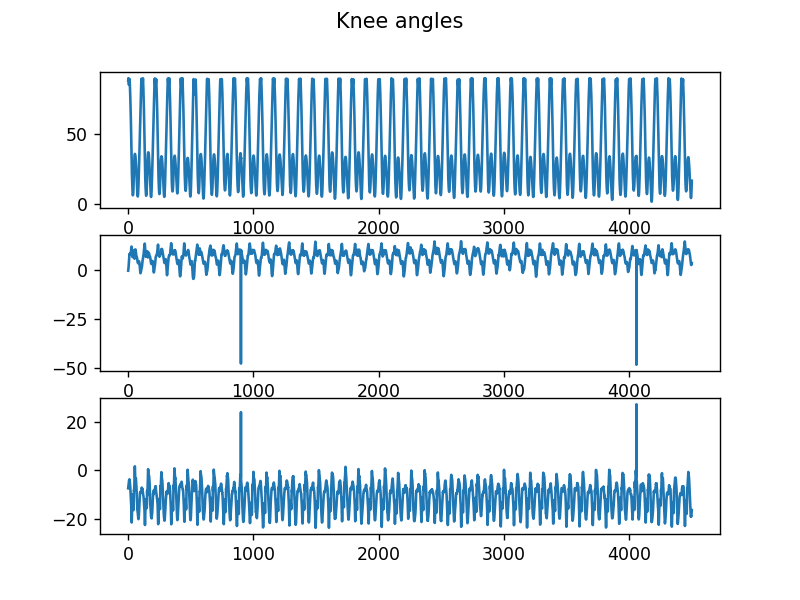

In [27]:
fig, axs = plt.subplots(3)
fig.suptitle('Knee angles')
axs[0].plot(angk_r[:,0])
axs[1].plot(angk_r[:,1])
axs[2].plot(angk_r[:,2])
plt.show()

# CONTINUAR
## REPETIR COM OS DADOS DA RIC
## VAI PRECISAR CRIAR MARCAS VIRTUAIS RASI E LASI pois usam cluster na pelve

In [ ]:
fname_out_R_RBDS = os.path.join(pathname, 'RBDS_run.csv')
df_r_RBDS = pd.read_csv(fname_out_R_RBDS, delimiter=',', index_col='Time')

In [ ]:
df_r_RBDS.head()

## RIC data set

In [ ]:
fname_out_RIC = os.path.join(pathname, 'RIC_static.csv')
df_s_RIC = pd.read_csv(fname_out_RIC, delimiter=',', index_col='Time')

In [ ]:
df_s_RIC.head()

In [ ]:
fname_out_R_RIC = os.path.join(pathname, 'RIC_run.csv')
df_r_RIC = pd.read_csv(fname_out_R_RIC, delimiter=',', index_col='Time')

In [ ]:
df_r_RIC.head()

In [ ]:
plt.figure()
plt.plot(df_r_RIC.values[:,6],df_r_RIC.values[:,7],'b')
plt.show()

In [ ]:
plt.figure()
plt.plot(df_r_RBDS.values[:,3],df_r_RBDS.values[:,4],'b')
plt.show()

### List of marker labels of each protocol

In [ ]:
from ordered_set import OrderedSet
# RIC
ls_RIC = df_s_RIC.columns.tolist()
mkr_S_labels_RIC = list(OrderedSet([x[:-2].replace('.','_') for x in ls_RIC]))
# RBDS
ls = df_s_RBDS.columns.tolist()
mkr_S_labels_RBDS = list(OrderedSet([x[:-2].replace('.','_') for x in ls]))

In [ ]:
mkr_S_labels_RBDS2=['LMAL', 'LMAM', 'LASI', 'LGTR', 'LHED', 'LHEL', 'LHEP', 
                    'LFIB', 'LIC', 'LKNL', 'LKNM', 'LMH1', 'LTOE', 'LMH5', 'LPSI', 'LSBL', 
                    'LSBM', 'LSTL', 'LSTM', 'LTBL', 'LTBM', 
                    'LTTL', 'LTTM', 'LTUB', 'RMAL', 'RMAM', 'RASI', 'RGTR', 'RHED', 
                    'RHEL', 'RHEP', 'RFIB', 'RIC', 'RKNL', 'RKNM', 'RMH1', 'RTOE', 'RMH5', 'RPSI', 
                    'RSBL', 'RSBM', 'RSTL', 'RSTM', 'RTBL', 
                    'RTBM', 'RTTL', 'RTTM', 'RTUB']

### Rename RBDS df columns to be consistent with RIC names

In [ ]:
xyz = list('XYZ')*len(mkr_S_labels_RBDS2)
mkr_S_labels_RBDS3 = [ele for ele in mkr_S_labels_RBDS2 for i in range(3)]
mkr_S_labels_RBDS4 = [mkr_S_labels_RBDS3[i]+'_'+xyz[i] for i in range(len(xyz))]

In [ ]:
df_s_RBDS.columns = mkr_S_labels_RBDS4

In [ ]:
df_s_RBDS.head()

## Plot markers and labels to check accuracy

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
for i in range(len(mkr_S_labels_RBDS2)):
    ydata = df_s_RBDS.values[100,3*i+1]
    xdata = df_s_RBDS.values[100,3*i]
    zdata = df_s_RBDS.values[100,3*i+2]
    ax.scatter(xdata, zdata, ydata, c='b');
    ax.text(xdata,zdata,ydata,  '%s' % (mkr_S_labels_RBDS2[i]), size=5, zorder=1,  
    color='k')
ax.set_aspect('equal')

In [ ]:
# Save df with new labels
df_s_RBDS.to_csv(os.path.join(pathname, 'RBDS_static_2.csv'))